<a href="https://colab.research.google.com/github/HOWARD258ym/HOWARD258ym/blob/main/%E3%80%8CTransfer_Learning_in_CNN_PyTorch_Wavy_Hair_classification_ipynb%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial step:** 

data set
http ://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

intro. doc.
https://zhuanlan.zhihu.com/p/35975956

train/wavy_hair(trainA): 8000 imgs

train/non_wavy_hair(trainB): 8000 imgs

val/wavy_hair(trainA): 2000 imgs

val/non_wavy_hair(trainB): 2000 imgs

mount data to this ipynb!

# Import dependencies

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# mount Google drive correctly
'''
!ls /content/drive/MyDrive/TIBAME
%cd "/content/drive/MyDrive/TIBAME/img_align_celeba/"

!ls
!unzip -u "/content/drive/MyDrive/TIBAME/img_align_celeba.zip" -d "/content/drive/MyDrive/TIBAME/"
'''

'\n!ls /content/drive/MyDrive/TIBAME\n%cd "/content/drive/MyDrive/TIBAME/img_align_celeba/"\n\n!ls\n!unzip -u "/content/drive/MyDrive/TIBAME/img_align_celeba.zip" -d "/content/drive/MyDrive/TIBAME/"\n'

@inproceedings{liu2015faceattributes,
  title = {Deep Learning Face Attributes in the Wild},
  author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},
  booktitle = {Proceedings of International Conference on Computer Vision (ICCV)},
  month = {December},
  year = {2015} 
}

In [65]:
# -*- coding: utf-8 -*-
#!/usr/bin/env python3

'''
Divide face accordance CelebA Attr type.
FROM https://zhuanlan.zhihu.com/p/35975956 


from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import shutil
import os

output_path = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/train"
image_path = "/content/drive/MyDrive/TIBAME/CelebA/img_align_celeba"
CelebA_Attr_file = "/content/drive/MyDrive/TIBAME/CelebA/list_attr_celeba.txt"
Attr_type = 34 # Wavy_Hair

def main():
    #Divide face accordance CelebA Attr (Attr_type = 34 # Wavy_Hair) label.
    trainA_dir = os.path.join(output_path, "trainA")
    trainB_dir = os.path.join(output_path, "trainB")
    if not os.path.isdir(trainA_dir):
        os.makedirs(trainA_dir)
    if not os.path.isdir(trainB_dir):
        os.makedirs(trainB_dir)

    not_found_txt = open(os.path.join(output_path, "not_found_img.txt"), "w")
    
    count_A = 0
    count_B = 0
    count_N = 0

    with open(CelebA_Attr_file, "r") as Attr_file:
        Attr_info = Attr_file.readlines()
        Attr_info = Attr_info[2:]
        index = 0
        for line in Attr_info:
            index += 1
            info = line.split()
            filename = info[0]
            filepath_old = os.path.join(image_path, filename)
            if os.path.isfile(filepath_old):
                if int(info[Attr_type]) == 1:
                    filepath_new = os.path.join(trainA_dir, filename)
                    shutil.copyfile(filepath_old, filepath_new)
                    count_A += 1
                else:
                    filepath_new = os.path.join(trainB_dir, filename)
                    shutil.copyfile(filepath_old, filepath_new)
                    count_B += 1
                print("%d: success for copy %s -> %s" % (index, info[Attr_type], filepath_new))
            else:
                print("%d: not found %s\n" % (index, filepath_old))
                not_found_txt.write(line)
                count_N += 1

    not_found_txt.close()
    
    print("TrainA have %d images!" % count_A)
    print("TrainB have %d images!" % count_B)
    print("Not found %d images!" % count_N)

if __name__ == "__main__":
    main()
'''

'\nDivide face accordance CelebA Attr type.\nFROM https://zhuanlan.zhihu.com/p/35975956 \n\n\nfrom __future__ import absolute_import\nfrom __future__ import division\nfrom __future__ import print_function\n\nimport shutil\nimport os\n\noutput_path = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/train"\nimage_path = "/content/drive/MyDrive/TIBAME/CelebA/img_align_celeba"\nCelebA_Attr_file = "/content/drive/MyDrive/TIBAME/CelebA/list_attr_celeba.txt"\nAttr_type = 34 # Wavy_Hair\n\ndef main():\n    #Divide face accordance CelebA Attr (Attr_type = 34 # Wavy_Hair) label.\n    trainA_dir = os.path.join(output_path, "trainA")\n    trainB_dir = os.path.join(output_path, "trainB")\n    if not os.path.isdir(trainA_dir):\n        os.makedirs(trainA_dir)\n    if not os.path.isdir(trainB_dir):\n        os.makedirs(trainB_dir)\n\n    not_found_txt = open(os.path.join(output_path, "not_found_img.txt"), "w")\n    \n    count_A = 0\n    count_B = 0\n    count_N = 0\n\n    with open(CelebA_Attr_file, 

In [66]:
#split to train and val folder from "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/train"
#partition (train,val) = (0.8,0.2)
'''
import os
from sklearn.model_selection import train_test_split
import shutil

path1 = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/train/trainA"
path11 = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/train/trainB"
path2 = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/val/trainA"
path22 = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/val/trainB"

images1 = os.listdir(path1)  # all pics. in path1
train1, val1 = train_test_split(images1, train_size=0.8, random_state=42)  # get all pics. and split

images11 = os.listdir(path11)  # all pics. in 
train11, val11 = train_test_split(images11, train_size=0.8, random_state=42)  # get all pics. and split

print(len(train1), len(val1))
print(len(train11), len(val11))
#print(val1) --- file name
#print(val11)

for v in val1:
    path3 = path1 + "/" + str(v) # get 0.2 partition data in path1 folder 
    # print("path3:", path3)
    shutil.move(path3, path2)  # move 0.2 path3 to path2

for v in val11:
    path3 = path11 + "/" + str(v) # get 0.2 partition data in path11 folder
    # print("path3:", path3)
    shutil.move(path3, path22)  # move 0.2 path3 to path22

# ref.：https://blog.csdn.net/qq_38500228/article/details/122535872
'''

'\nimport os\nfrom sklearn.model_selection import train_test_split\nimport shutil\n\npath1 = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/train/trainA"\npath11 = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/train/trainB"\npath2 = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/val/trainA"\npath22 = "/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/val/trainB"\n\nimages1 = os.listdir(path1)  # all pics. in path1\ntrain1, val1 = train_test_split(images1, train_size=0.8, random_state=42)  # get all pics. and split\n\nimages11 = os.listdir(path11)  # all pics. in \ntrain11, val11 = train_test_split(images11, train_size=0.8, random_state=42)  # get all pics. and split\n\nprint(len(train1), len(val1))\nprint(len(train11), len(val11))\n#print(val1) --- file name\n#print(val11)\n\nfor v in val1:\n    path3 = path1 + "/" + str(v) # get 0.2 partition data in path1 folder \n    # print("path3:", path3)\n    shutil.move(path3, path2)  # move 0.2 path3 to path2\n\nfor v in val11:\n    path3 = p

In [67]:
from __future__ import print_function, division

import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from torch.hub import load_state_dict_from_url
print("torch version:",torch.__version__)

from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import StepLR
import itertools
import numpy as np

import torchvision
from torchvision import datasets, models, transforms
print("torchvision version:", torchvision.__version__)

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
# set Scale interval
%matplotlib inline
#plt.show() # with %matplotlib inline, no need for plt.show()

import time
import os
import copy
import cv2

import numpy as np

from PIL import Image

from google.colab.patches import cv2_imshow

plt.ion()   # interactive mode

torch version: 1.13.1+cu116
torchvision version: 0.14.1+cu116


In [68]:
# __all__ : define all models import name

__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']

# model_urls: download models and training weightws from following www. 

model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}

#Create PyTorch data generators

In [69]:
## try to adjust data augmentation strategy 

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)), # adjust (size , scale , ratio) >>> here set size(224,224) pixel, scale(length & width) randomly from (0.8 ~ 1)
        transforms.RandomHorizontalFlip(p=0.7), # p : prob.
        transforms.RandomVerticalFlip(p=0.7),
        transforms.ToTensor(), # adjust grayscale range to (0-1)
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # adjust grayscale range in control [mean],[std] 
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224), # CenterCrop( size=(200,200) ) reserve (200,200)pixels from center   
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# the directory of your data in Google Drive
######## following modify ########
######## female >>> trainA(wavy_hair) , male >>> trainB(non_wavy_hair) #########

# do remind that before executing DCGAN male/female face generation example, there are only 1000 images in the train/male and train/female, respectively.
# '/content/drive/My Drive/male_female_images_mixed/train/female’
# '/content/drive/My Drive/male_female_images_mixed/train/male’

data_dir = '/content/drive/MyDrive/TIBAME/CelebA/Wavy_Hair/'


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}


In [70]:
#print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

show some training data. Make sure the lables match the images

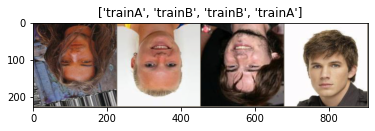

In [71]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    # if opencv is desired
    #new_img_rgb = cv2.cvtColor(np.uint8(inp*256), cv2.COLOR_BGR2RGB)
    #print(title)    
    #cv2_imshow(new_img_rgb)

    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))


# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

#Train the model

Training the model,including:

Scheduling learning rate,LR scheduler,

Saving the best model

In [72]:
NUM=44
num_epochs=NUM
epoch_train_loss_his = np.zeros(num_epochs)
epoch_val_loss_his = np.zeros(num_epochs)
epoch_train_acc_his = np.zeros(num_epochs)
epoch_val_acc_his = np.zeros(num_epochs)

# no "scheduler" version
#def train_model(model, criterion, optimizer, num_epochs=NUM):
# delete "scheduler.step()" below

# for resnet50
def train_model(model, criterion, optimizer, scheduler, num_epochs=NUM):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)                            
                running_corrects += torch.sum(preds == labels.data)
            # ---------------------------------------------------------------
            # cal. epoch_loss & epoch_acc 
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print( phase )
            # list the 'train' & 'val' loss & acc
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            # save my his. record 
            #for phase in ['train', 'val']:
            if phase == 'train':                
              epoch_train_loss_his[epoch] = epoch_loss
              epoch_train_acc_his[epoch] = epoch_acc
              print('CHECK if train:',phase)
            else:
              epoch_val_loss_his[epoch] = epoch_loss
              epoch_val_acc_his[epoch] = epoch_acc
              print('CHECK if val:',phase)

        print()
            
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model
    

In [73]:
# check if anything's wrong above
#input("Please press the Enter key to proceed")
#check shape of epoch_train_loss_his & epoch_val_loss_his & epoch_train_acc_his & epoch_val_acc_his
#print(epoch_train_loss_his)

# Create the network

**Case 1:
using ConvNet as fixed feature extractor
Here, we need to freeze all the network except the final layer. 
Set requires_grad == False to freeze the parameters 
so that the gradients are not computed in backward().**

#CASE 1 : USE **alexnet**

In [74]:
'''
# do "feature extractor" , using ( pretrained alexnet )

model_conv = models.alexnet(pretrained=True)

for param in model_conv.parameters():
    param.requires_grad = False # param.requires_grad = False ------ represent conv. no operate !!
# Parameters of newly constructed modules have requires_grad=True by default

model_conv.classifier = nn.Sequential(*[model_conv.classifier[i] for i in range(6)]) # remove the last layer i = 7 (4096x1000)
addition_fc = nn.Linear(4096, 2) # the layer to be stacked
model_conv.classifier = nn.Sequential(model_conv.classifier,addition_fc)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 5 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=5, gamma=0.1)

# train the model with feature extractor way
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=NUM)
'''


'\n# do "feature extractor" , using ( pretrained alexnet )\n\nmodel_conv = models.alexnet(pretrained=True)\n\nfor param in model_conv.parameters():\n    param.requires_grad = False # param.requires_grad = False ------ represent conv. no operate !!\n# Parameters of newly constructed modules have requires_grad=True by default\n\nmodel_conv.classifier = nn.Sequential(*[model_conv.classifier[i] for i in range(6)]) # remove the last layer i = 7 (4096x1000)\naddition_fc = nn.Linear(4096, 2) # the layer to be stacked\nmodel_conv.classifier = nn.Sequential(model_conv.classifier,addition_fc)\n\nmodel_conv = model_conv.to(device)\n\ncriterion = nn.CrossEntropyLoss()\n\n# Observe that only parameters of final layer are being optimized as\n# opposed to before.\noptimizer_conv = optim.SGD(model_conv.parameters(), lr=0.001, momentum=0.9)\n\n# Decay LR by a factor of 0.1 every 5 epochs\nexp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=5, gamma=0.1)\n\n# train the model with feature ex

#CASE 1 : USE **ResNet50**

In [75]:
'''
# do "feature extractor" , using ( pretrained ResNet50 )

### resnet50 MODEL %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model_conv = models.resnet50(pretrained=True).to(device)

for param in model_conv.parameters():
    param.requires_grad = False # param.requires_grad = False ------ represent conv. no operate !!
# Parameters of newly constructed modules have requires_grad=True by default

#print(model_conv)

# modify the last fc,transfer to few layers(2048*1000＞＞＞２０４８＊２)
model_conv.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

#(fc): Sequential(
#    (0): Linear(in_features=2048, out_features=128, bias=True)
#    (1): ReLU(inplace=True)
#    (2): Linear(in_features=128, out_features=2, bias=True)  

#print(model_conv)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.Adam(model_conv.fc.parameters())

model_conv = train_model(model_conv, criterion, optimizer_conv, num_epochs=NUM)
'''


'\n# do "feature extractor" , using ( pretrained ResNet50 )\n\n### resnet50 MODEL %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\nmodel_conv = models.resnet50(pretrained=True).to(device)\n\nfor param in model_conv.parameters():\n    param.requires_grad = False # param.requires_grad = False ------ represent conv. no operate !!\n# Parameters of newly constructed modules have requires_grad=True by default\n\n#print(model_conv)\n\n# modify the last fc,transfer to few layers(2048*1000＞＞＞２０４８＊２)\nmodel_conv.fc = nn.Sequential(\n               nn.Linear(2048, 128),\n               nn.ReLU(inplace=True),\n               nn.Linear(128, 2)).to(device)\n\n#(fc): Sequential(\n#    (0): Linear(in_features=2048, out_features=128, bias=True)\n#    (1): ReLU(inplace=True)\n#    (2): Linear(in_features=128, out_features=2, bias=True)  \n\n#print(model_conv)\n\ncriterion = nn.CrossEntropyLoss()\noptimizer_conv = optim.Adam(model_conv.fc.parameters())\n\nmodel_conv = train_model(model_conv, 

# **Case 2:**
Finetuning the convnet, Load a pretrained model and reset final fully connected layer.**

#CASE 2 : USE **alexnet**

In [76]:
'''
## Alexnet
 
# change models.alexnet(pretrained=false) >>> use default() ------ train Alexnet from scratch!!
model_ft = models.alexnet(pretrained=True).to(device)

model_ft.classifier = nn.Sequential(*[model_ft.classifier[i] for i in range(6)])  # remove the last layer (4096x1000)
addition_fc = nn.Linear(4096, 2) # the layer to be stacked
model_ft.classifier = nn.Sequential(model_ft.classifier,addition_fc)
#model_ft = nn.Sequential(model_ft,addition_fc)

criterion = nn.CrossEntropyLoss()
#criterion = FocalLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0)

# step size could be
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

# train the model using a fined-tuned way
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=NUM)
'''

'\n## Alexnet\n \n# change models.alexnet(pretrained=false) >>> use default() ------ train Alexnet from scratch!!\nmodel_ft = models.alexnet(pretrained=True).to(device)\n\nmodel_ft.classifier = nn.Sequential(*[model_ft.classifier[i] for i in range(6)])  # remove the last layer (4096x1000)\naddition_fc = nn.Linear(4096, 2) # the layer to be stacked\nmodel_ft.classifier = nn.Sequential(model_ft.classifier,addition_fc)\n#model_ft = nn.Sequential(model_ft,addition_fc)\n\ncriterion = nn.CrossEntropyLoss()\n#criterion = FocalLoss()\n\n# Observe that all parameters are being optimized\noptimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0)\n\n# step size could be\nexp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)\n\n# train the model using a fined-tuned way\nmodel_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=NUM)\n'

#CASE 2 : USE **ResNet50**

In [77]:
'''
# do "Finetuning " , using ( pretrained ResNet50 )

### resnet50 MODEL %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model_conv = models.resnet50(pretrained=True).to(device)

# modify the last fc,transfer to few layers(2048*1000＞＞＞２０４８＊２)
model_conv.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device) 

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.Adam(model_conv.fc.parameters())

model_conv = train_model(model_conv, criterion, optimizer_conv ,num_epochs=NUM)
'''

'\n# do "Finetuning " , using ( pretrained ResNet50 )\n\n### resnet50 MODEL %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\nmodel_conv = models.resnet50(pretrained=True).to(device)\n\n# modify the last fc,transfer to few layers(2048*1000＞＞＞２０４８＊２)\nmodel_conv.fc = nn.Sequential(\n               nn.Linear(2048, 128),\n               nn.ReLU(inplace=True),\n               nn.Linear(128, 2)).to(device) \n\ncriterion = nn.CrossEntropyLoss()\n\noptimizer_conv = optim.Adam(model_conv.fc.parameters())\n\nmodel_conv = train_model(model_conv, criterion, optimizer_conv ,num_epochs=NUM)\n'

#CASE 2 : USE **ResNet50** also adjust lr


In [ ]:
# do "Finetuning " , using ( pretrained ResNet50 )

### resnet50 MODEL %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model_conv = models.resnet50(pretrained=True).to(device)

# modify the last fc,transfer to few layers(2048*1000＞＞＞２０４８＊２)
model_conv.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device) 

criterion = nn.CrossEntropyLoss()

initial_lr = 100
optimizer_conv = optim.Adam(model_conv.fc.parameters(), lr = initial_lr)

scheduler_1 = StepLR(optimizer_conv, step_size=5, gamma=0.1) # renew para. every 3 batchs,gamma use default:10 times decay/per regulation

model_conv = train_model(model_conv, criterion, optimizer_conv, scheduler_1 ,num_epochs=NUM)

print("initial lr：", optimizer_conv.defaults['lr'])
 
for epoch in range(1, NUM):

    print("%dth epoch lr：%f" % (epoch, optimizer_conv.param_groups[0]['lr']))
    scheduler_1.step()

#**Case 3:**
Load a non-pretrained model and reset final fully connected layer ** 

#CASE 3 : USE **alexnet**

In [ ]:
'''
## Alexnet
# change ResNet50
 
#model_ft = models.alexnet(pretrained=True) # model_ft : finetune model
# change models.alexnet(pretrained=false) >>> use default() ------ train Alexnet from scratch!!
model_ft = models.alexnet()
model_ft.classifier = nn.Sequential(*[model_ft.classifier[i] for i in range(6)])  # remove the last layer (4096x1000)
addition_fc = nn.Linear(4096, 2) # the layer to be stacked
model_ft.classifier = nn.Sequential(model_ft.classifier,addition_fc)
#model_ft = nn.Sequential(model_ft,addition_fc)
print(model_ft)
##

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
#criterion = FocalLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0)

# step size could be
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

# train the model using a fined-tuned way
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=NUM)
'''

#CASE 3 : USE **ResNet50**

In [ ]:
'''
## do "train resnet50 from scratch!!" , using ( ResNet50 )
 
model_conv = models.resnet50().to(device)
# change models.resnet50(pretrained=false) >>> use default() ------ train resnet50 from scratch!!

# modify the last fc,transfer to few layers(2048*1000＞＞＞２０４８＊２)
model_conv.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device) 

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.Adam(model_conv.fc.parameters())

model_conv = train_model(model_conv, criterion, optimizer_conv, num_epochs=NUM)
'''

In [ ]:
# save data 
#np.savez_compressed('savez_compressed.npz', my_arr1=epoch_train_loss_his, my_arr2=epoch_val_loss_his, my_arr3=epoch_train_acc_his, my_arr4=epoch_val_acc_his )

# load data
#npz_file = np.load('savez_compressed.npz')
#new_arr1, new_arr2, new_arr3, new_arr4  = npz_file['my_arr1'], npz_file['my_arr2'], npz_file['my_arr3'], npz_file['my_arr4']

In [ ]:
# print  history
# epoch_train_loss_his & epoch_val_loss_his & epoch_train_acc_his & epoch_val_acc_his

plt.figure()

x_values=list(range(num_epochs))

# fig.1
plt.subplot(2, 2, 1)
plt.plot(x_values,epoch_train_loss_his)
plt.legend(['train Loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.ylim(0,2)

# fig.2
plt.subplot(2, 2, 2)
plt.plot(x_values,epoch_val_loss_his)
plt.legend(['val. Loss'])
plt.xlabel('epoch')
#plt.ylabel('Loss')
plt.ylim(0,2)

# fig.3
plt.subplot(2, 2, 3)
plt.plot(x_values,epoch_train_acc_his)
plt.legend(['train acc.'])
plt.xlabel('epoch')
plt.ylabel('acc.')
plt.ylim(0.4,1)

# fig.4
plt.subplot(2, 2, 4)
plt.plot(x_values,epoch_val_acc_his)
plt.legend(['val acc.'])
plt.xlabel('epoch')
#plt.ylabel('acc.')
plt.ylim(0.4 ,1)

#x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
#y_major_locator=MultipleLocator(0.5)

#ax=plt.gca()
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
#ax.yaxis.set_major_locator(y_major_locator)

# part of code modified from: https://blog.csdn.net/weixin_44520259/article/details/89917026

plt.show()

print(epoch_val_acc_his) 

**Visualizing the model predictions:**
Generic function to display predictions for a few images

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)
        
#visualize_model(model_ft)
visualize_model(model_conv)